<title>HTML Elements Reference</title>


~~~
author:
- Ryan Greenup
bibliography: ref.bib
title: Groebner Bases
~~~

# Groebner Bases

## Introduction

Groebner bases, as a topic generally, is primarily concerned with solutions of  systems of
polynomial equations. 

In order to drive examples the *Sympy* package will be used:

In [114]:
## Sympy Boiler Plate
from __future__ import division
from sympy import *
t, x, y, z = symbols('t x y z')  # I believe this order matters, i.e. t<-x1, x <- x2, y <- x3 ...
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing()
init_printing(use_latex='mathjax', latex_mode='equation')

## Quick Copy LaTeX
import pyperclip
def lx(expr):
    pyperclip.copy(latex(expr))
    print(expr)
# NB: See also srepr(), display() and print_mathml()

## 3d Plotting
from sympy import symbols
from sympy.plotting import plot3d
from sympy.plotting import plot

## typical things
import numpy as np
import matplotlib as plt
import pandas as pd



### Motivation
Consider a shop front with a big sign out the front that reads *Algebraic Geometry Pty. Ltd.*, this workshop is manned by an old mathematician who spends his days working on polynomials. 

One day an engineer walks into the shop with an old canvas bag, filled with polynomials and spreads them out over the counter. The engineer looks to the old man and says "I have these polynomials but I don't quite know what to do with them, can you help?". The old man, without saying a word, scoops up the polynomials and places them on his scales. These scales are not ordinary scales, they don't measure weight but instead provide all the possible mutual solutions to the equations placed on them, this is known as **the variety** of the set.

This old man is quite skilled and just by looking at the variety he is able to consider all the infinitely many sets of polynomial functions that would lead to the same variety, this is known as the **ideal of the variety** and the trick of his craft is to be able to pick out which one of those sets of polynomials is the most *useful*. 

In this case, however, the engineer has provided a non-linear system and so being able to choose which set of functions to return is more challenging.

In order to do this, the old man takes the bag of polynomials into the back of his shop and uses a machine known as *Buchberger's Algorithm*, this machine sucks up polynomials from the bag and manipulates them to form new polynomials which belong to a set known as the Groebner Basis, the machine then sifts through those new polynomials and removes any duplicates, this is known as the Reduced Groebner Basis.

When the old man returns to the engineer with this new collection of polynomials, the engineer is very happy with them because they can now be used to draw insights about the system generally.

### Discussion

What this analogy hopes to convey is that the Groebner basis is a system of polynomials that can be derived from a pre-existing sytem, by using Buchberger's Algorithm. This Groebner Basis will share the same solutions as the pre-existing set of functions and in that sense will be equivalent to it, but it will be more descriptive of the solutions. For example in linear algebra a system might be:

\begin{align}
2x + 3y - 5  &= 0 \\
7x + 9y + 11 &= 0
\end{align}

And in that case the Groebner Basis would just be the solution:

In [115]:
F = [2*x + 3*y + 5, 7*x + 9*y + 11]
G = polys.polytools.groebner(F, x, y, order = 'lex', method = 'buchberger')
for poly in G:
    display(poly)

x - 4

3⋅y + 13

If the system was non-linear and single-variable the Groebner Basis would simply be the *Greatest Common Divisor* (*GCD*):

In [116]:
# Initial Set
F = [
    (x**3 + 3)   * (x-1)*(x+2 )*(x+3 )*(x+5 ),
    (x**3 + 3)   * (x-7)*(x+11)*(x+13)*(x+17)
     ]
# Groebner Basis     
G = polys.polytools.groebner(F, x, y, order = 'lex', method = 'buchberger')

# Print solution
for poly in G:
    display(poly)

 3    
x  + 3

But the motivating example here is a non-linear system in multiple variables, this is more challenging to solve and the *useful solution* is significantly less clear, a relatively simple example, however, is the intersection of two parabaloids:

In [117]:
# Initial Set
F = [x**2-y**2+y**3, y**2-x**2+y]     
F = [x**2+y**2-1, -x**2-y**2+1 ]     

# Groebner Basis     
G = polys.polytools.groebner(F, x, y, order = 'lex', method = 'buchberger')

print("Problem:\n\n")
# Print system
for poly in F:
    display(poly)

print("\n\nSolution:\n\n")
# Print solution
for poly in G:
    display(poly)


Problem:




 2    2    
x  + y  - 1

   2    2    
- x  - y  + 1



Solution:




 2    2    
x  + y  - 1

In [118]:
import plotly.graph_objects as go
import numpy as np

def f1(x, y):
    return x**2+y**2-10

def f2(x, y):
    return -x**2-y**2+10

def g1(x, y):
    return x*y+y**2-10

m = 5
n = 5

zf1 = np.ndarray([2*m, 2*n])
zf2 = np.ndarray([2*m, 2*n])
zg1 = np.ndarray([2*m, 2*n])
# zg2 = np.ndarray([m, n])

for j in range(-m, m):
    for i in range(-n, n):
        zf1[m+i, n+j] = -f1(i, j)
        zf2[m+i, n+j] = -f2(i, j)
        zg1[m+i, n+j] = g1(i, j)
        # zg2[i, j] = g2(i, j)

In [119]:
fig = go.Figure(data=[
    go.Surface(z=zf1, opacity=0.8, colorscale='Blues', showscale=False),
    go.Surface(z=zf2, showscale=False, opacity=0.7, colorscale='Reds')
])

fig.show()


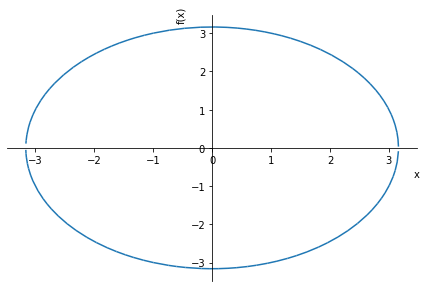

In [120]:
# plot3d(F[0], F[1])
# plot3d(G[0])
plot(sqrt(10-x**2), -sqrt(10-x**2))

## Investigation Summary

Much of the theory of Groebner Basis is approached from the perspective of an algebraist, this has the unfourtunate consequence of significantly limiting the accessibility of the topic. Fortunately this approach is not required in order to gain a broad understanding of the theory and applications of Groebner Basis.

My advice to anybody initially approaching this topic would be to focus first on implementing *Buchberger's Algorithm* using *Python* with *Sympy*. This algorithm is a reasonably straight forward approach to find solutions for a system of polynomial equations, similar in some ways to the Euclidean Algorithm to find GCD's. Finding resources that plainly explain this algorithm, however, can also be quite challenging, my recommendation, would be to refer to the following resources for guidance:

-   Lectures 14 and 15 of Andreas Schulz OCW Integer Programming Course
    <sup>  [@andreasschulzIntegerProgrammingCombinatorial]  </sup>

-   Chapters 1-2 of *Ideals, Varieties and Algorithms*
    <sup>  [@coxIdealsVarietiesAlgorithms1997]  </sup>

-   Lecture 15 of Judy Holdenner's course on Algebraic Geometry
    <sup>  [@judyholdenerAlgebraicGeometry2013]  </sup>

-   Lecture 14 of Pablo Parrilo's course on Algebraic Techniques
    <sup>  [@pabloparriloAlgebraicTechniquesSemidefinite]  </sup>

-   The *Sympy* source code for:

    -   `polys.roebnertools`
        <sup>  [@sympydevelopmentteamSympyPolysGroebnertools]  </sup>

    -   `solvers.polysys` <sup>  [@sympydevelopmentteamSympySolversPolysys]  </sup>

-   The *Sympy* documentation for *Polynomial Manipulation*
    <sup>  [@sympydevelopmentteamGrobnerBasesTheir2021]  </sup>


Unfortunately these resources were not
known to me until very late in the investigation and upon reflection it's clear to me that approaching this topic from the perspective of abstract algebra is a very inefficient approach and I would strongly recommend against it. I hope that this
report can serve as a guide for others who pick up this topic such that
they can come to broadly understand core concepts and practical applications
    quickly without wasting time on abstract concepts that are often poorly
    explained in the literature.
of a better word, as a red
    herring.

Although *Sympy* is probably not the best tool for studying commutative
algebra specifically (and the implementation may not be battle tested
either, see e.g. <sup>  [@WrongGroebnerBasis]  </sup>), the simple and accessible
nature of *Sympy* made it's documentation by far the most valuable
resource for grappling with this topic.

An extension to this investigation would be to:

-   Try and implement Buchberger's Algorithm from scratch using
    functions and iterations in *Python* in order to return a Reduced
    Groebner Basis

    -   See Definition 4 of <sup>  [@coxIdealsVarietiesAlgorithms1997 §7]  </sup>

-   Try to demonstrate, in good detail, the relationship between the
    Euclidean Algorithm and Buchberger's Algorithm

    -   See <sup>  [@coxIdealsVarietiesAlgorithms1997 p. 95]  </sup>

-   Try to implement Buchberger's Algorithm using *Normal Selection
    Strategy* <sup>  [@hibiGrobnerBasesStatistics2014 §3.1.2]  </sup>, see also
    <sup>  [@sympydevelopmentteamSympyPolysGroebnertools; @prof.berndsturmfelsIntroductionGrobnerBases2017]  </sup>.

### Further Resources

The following resources may be useful as reference material, but I would
suggest against using these as any sort of primary material for the topic:

1.  Judson, T. W., & Open Textbook Library, Abstract algebra theory and
    applications <sup>  [@judsonAbstractAlgebraTheory2016]  </sup>

2.  Howlett, R., An undergraduate course in Abstract Algebra: Course
    notes for MATH3002 <sup>  [@roberthowlettUndergraduateCourseAbstract]  </sup>

3.  Lee, G., Abstract Algebra <sup>  [@gregoryleeAbstractAlgebra2018]  </sup>

4.  Grillet, P. A., Abstract Algebra <sup>  [@grilletAbstractAlgebra2007]  </sup>

5.  Hibi, T., Grobner Bases: Statistics and Software Systems
    <sup>  [@hibiGrobnerBasesStatistics2014]  </sup>

6.  Adams, W. W., & Loustaunau, P., An introduction to Gröbner bases
    <sup>  [@adamsIntroductionGrobnerBases1994]  </sup>

7.  Nicodemi, O., Sutherland, M. A., & Towsley, G. W., An introduction
    to abstract algebra with notes to the future teacher
    <sup>  [@nicodemiIntroductionAbstractAlgebra2007a]  </sup>

Further material that I haven't had a chance to look throughA: includes:

-   Becker, T., Weispfenning, V., & Kredel, H., Gröbner bases: a
    computational approach to commutative algebra
    <sup>  [@beckerGrobnerBasesComputational1993]  </sup>

## Introduction

A Groebner Basis is a set of polynomials that spans the solution space
of another set of polynomials, they are of interest to us because they
are useful for solving systems of polynomial equations and provide a
generalized theory that shows the relationships between:

-   Polynomial Long Division with multiple variables and divisors, see
    e.g. <sup>  [@coxIdealsVarietiesAlgorithms1997 §3]  </sup>

-   The Division Algorithm see e.g. [@coxIdealsVarietiesAlgorithms1997
    §3] and <sup>  [@nicodemiIntroductionAbstractAlgebra2007a]  </sup>

-   The LCM and GCD <sup>  [@coxIdealsVarietiesAlgorithms1997 §2.6]  </sup>

-   The Euclidean Algorithm and Gaussian Elimination

    -   Both of which provide output that are special cases of Groebner
        Bases.

The theory of Groebner Bases even provides a framework to re-express the
Fundamental Theorem of Algebra
<sup>  [@prof.berndsturmfelsIntroductionGrobnerBases2017]  </sup> .

## Polynomials ##

Let $K$ be some field (typically $\mathbb{Q}, \mathbb{R},
\mathbb{C}$, see §[9.1.1.6](#sec:org5f09c06){reference-type="ref"
reference="sec:org5f09c06"} for more information)

### Monomials ###

A *monomial* in the variables $x_1, x_2, \ldots x_n$ is given by:
<sup>  [@hibiGrobnerBasesStatistics2014 p. 3]  </sup>

\begin{align}
   \prod^n_{i=1} \left[ x_i^{a_i} \right] = x_1^{1_1} \cdot x_2^{a_2} \cdot
   x_3^{a_3} \ldots x_n^{a_n} \quad : a \in \mathbb{Z^+}
\end{align}

Note however that $a$ must be a non-negative integer
<sup>  [@e.h.connellElementsAbstractLinear2001 p. 48]  </sup>

#### Degree ####

The degree is given by the sum of the exponents, so:


$$
 \mathrm{deg}\left(   \prod^n_{i=1} \left[ x_i^{a_i} \right]   \right) = \sum^{n}_{i= 1}   \left[ a_i \right] 
$$


### Terms ###

A term is a monomial with a non-zero coefficient, so for example:


$$

17 \cdot x_1^3 \cdot x_2^5 \cdot x_3^{13}

$$


Is a term with degree 21 $(3+5+13)$ and a coefficient of 17.

### Polynomials ###

A polynomial is a finite sum of terms, the degree of which is defined to
be the maximum degree of any of the terms.

#### Exception ####

The polynomial:


$$
f = 0
$$


Has an undefined degree. Terms only have a **non-zero** coefficient,
hence $0$ doesn't have any terms and so the definition of degree doesn't
work for it.

Whereas $f=c, \quad \exists c \in \mathbb{C}$ does have 1 term, for
which the degree is 0.

##### Support of a polynomial #####

The support of a polynomial $f$ is the set of monomials appearing in
$f$, e.g. for the following 6th degree polynomial in 2 variables, the
support of that polynomial is given by:


$$
f(x) = x^2+3x^3+4y \implies \mathrm{supp}\left(f\right) =
     \left\{x^2, 3x^3, 4y\right\}
$$


The initial of the support $\mathrm{in}_{\prec}\left(f\right)$ is the
polynomial with the highest ranking with respect to some ordering of the
monomials (see §) <sup>  [@hibiGrobnerBasesStatistics2014 1.1.5]  </sup>.

So for example a polynomial could be formed by:
<!--- See also https://stackoverflow.com/a/50565805 --->


In [121]:
coeff   = [1, 3, 5, 7, 11, 13]
support = [x**3, x**2, x**3*y**2, x, y**2, y**4] 

terms   = [coeff[i]*support[i] for i in range(6)]
polynomial = sum(terms)

display(polynomial)

   3  2    3      2             4       2
5⋅x ⋅y  + x  + 3⋅x  + 7⋅x + 13⋅y  + 11⋅y 

The degree of which would be given by 5, corresponding to the monomial $x^3y^2$:

Extracting the degree from a polynomial using Sympy is somewhat more challenging, it is however useful for later:

In [122]:
def monomial_degrees(f):
    # Break the polynomial into a list of monomials
    monomials = [m/LC(m) for m in f.as_ordered_terms()]

    # Break the monomial into a list of sets of the variables that compose each monomial
    sets=[m.atoms(Pow) for m in monomials]

    # Break each variable into exponents and add up the degree of each monomial
    monomial_degrees = []
    for set in sets:
        degree = 0
        for var in set:
            exponent = var.as_base_exp()[1]
            degree += exponent
        monomial_degrees.append(degree)
    
    return monomial_degrees

def polynomial_degree(f):
    return max(monomial_degrees(f))
    
display(
    "Polynomial is",
    polynomial,
    "Degrees of each Monomial:",
    monomial_degrees(polynomial),
    "Degree of the Polynomial:",
    polynomial_degree(polynomial)
)



'Polynomial is'

   3  2    3      2             4       2
5⋅x ⋅y  + x  + 3⋅x  + 7⋅x + 13⋅y  + 11⋅y 

'Degrees of each Monomial:'

[5, 3, 2, 0, 4, 2]

'Degree of the Polynomial:'

5


#### Other Terminology

The following terms are commonly used:
<sup>  [@coxIdealsVarietiesAlgorithms1997 §2.2]  </sup>

-   The $\mathrm{multidegree}\left(f\right)$, is the largest power of
    any variable of any monomial in a polynomial

-   The Leading coefficient $\mathrm{LC}\left(f\right)$ is the term
    corresponding to the monomial containing the variable that
    corresponds to the multidegree

    - It appesars, however, that the usage of this term by Sympy and <sup>[@coxIdealsVarietiesAlgorithms1997 §2.2]</sup> is inconsistent, the relevance of this is currently unclear to me <sup>#TODO</sup>
    
-   The Leading monomial $\mathrm{LM}\left(f\right)$ is the monomial
    corresponding containing the variable that corresponds to the
    multidegree

-   The Leading term $\mathrm{LT}\left(f\right)$ is the product of the
    leading coefficient and the leading monomial

So for example, in the polynomial:


$$
f= 4x^2y^2 + 3x^3 + 7xy
$$


-   The initial is $4x^2y^2$

-   The Leading Coefficient is 3

-   The Leading Monomial is $x^3$

-   The Leading Term [^2] is $x^3$

#### Homogenous Polynomial

If all terms of a polynomial have an equal degree (say $\exists q
     \in \mathbb{N}$ Then that polynomial is said to be a *homogenous
polynomiial of degree $q$*, e.g.


$$
x_1^{3}\cdot x_2^{4} \cdot x_3^{2} + x_1^{6}\cdot x_5^{2} \cdot x_7
$$


is a homogenous polynomial of degree 7.

##### Example
Consider the polynomial from before:

In [123]:
print("The polynomial is:")
display(polynomial)

print("The multidegree is given by:")
multi_degrees    = [degree(polynomial, var) for var in [x,y,z]]
multi_degree_val = max(degrees)
print(multi_degree_val)

print("The Leading Term is given by:")
display(LT(polynomial))


print("The Leading Coefficient is given by:")
# lc = Poly(LT(polynomial)).coeffs()[0]
display(LC(polynomial))

print("The Leading Monomial is given by:")
display(LM(polynomial))


The polynomial is:


   3  2    3      2             4       2
5⋅x ⋅y  + x  + 3⋅x  + 7⋅x + 13⋅y  + 11⋅y 

The multidegree is given by:


NameError: name 'degrees' is not defined

#### The Polynomial Ring

Let $K\left[x_1, x_2, x_3, \ldots x_n\right]=K\left[\mathbf{X}_n\right]$
denote the set of all polynomials in the variables
$x_1, x_2, x_3, \ldots x_n$ with coefficients in some field $K$.

If $f$ and $g$ are polynomials from $K\left[x_1, x_2, x_3,
     \ldots x_n\right]$ with addition and multiplication defined in the
ordinary way (i.e. just normal algebra), then $K\left[x_1,
     x_2, x_3, \ldots x_n\right]$ forms an algebraic structure known as
a Ring.

Readers may be familiar with the axioms of a vector space, for which the
set of polynomials $K\left[x_1, x_2, x_3, \ldots x_n \right]$ [^todo1] of degree  $\leq n$ also
satisfies <sup>  [@larsonElementaryLinearAlgebra1991a §4.4]  </sup>, a ring structure
is much the same concept, it's a set with specific characteristics. One
of the main differences is that while a vector space requires a scalar
multiplicative identity, a ring structure does not.

On the other hand not all vector spaces are necessarily rings because
they are not necessarily closed under multiplication (although defining
multiplication by element-wise product would remedy this), see
§[9.1.1.4](#sec:orgb572ffe){reference-type="ref"
reference="sec:orgb572ffe"} for more information.

[^todo1]: Would this need to be over a field? or would coefficients in a ring be sufficient for the set of polynomials to be a vector space?


## Ideals and Varieties ##


### Affine Space ###

The affine $n$-space of some field $K$ is given by:
<sup>  [@coxIdealsVarietiesAlgorithms1997 §1.1]  </sup>


$$
K^n=\left\{\left(a_1, a_2, a_3, \ldots, a_n \right) \mid a_i \in K, \forall i \in \mathbb{Z}^+\right\}
$$


For example if $K$ was given by $\mathbb{R}$ the resulting affine
$2$-space would be the *Cartesian Plane*.



### Zero Point ###

The zero-point of some function $f\in K\left[\mathbf{X}_n\right]$ is a
point in $K^n$: <sup>  [@hibiGrobnerBasesStatistics2014]  </sup>


$$
\begin{aligned}
      f\left( a_1, a_2, a_3 \ldots a_n \right) =0
.\end{aligned}
$$


These points are often referred to as roots
<sup>  [@judsonAbstractAlgebraTheory2016 §17.2]  </sup>, however this is usually in the
context of equations more broadly rather than functions specifically.
<sup>  [@82645]  </sup>



### Variety ###

Consider a set of functions $F=\left\{ f_{1},f_{2},f_{3},\ldots
   f_{s}\right\}$, the variety of this set of functions is denoted
$\mathbf{V}\left(F\right)$ and is the set of all zero-points of all the
functions:


$$
\boldsymbol{V}\left(F\right)=\left\{ \left(a_{1},a_{2},a_{3},\ldots a_{n}\right)\in K^{n}\mid f_{i}\left(a_{1},a_{2},a_{3},\ldots a_{n}\right),\forall i\in\mathbb{Z}^{+}<s\right\}
$$


The convention is that all functions in $F$ are set to be equal to 0,
and if this convention is taken, the variety of that set is the set of
solutions corresponding to that set of equations.



#### Example ####

Consider for example the set $\left\{ -y+x^{2}-1,-y+1\right\}$, the
solution to this system can be found by substitution:


$$
\begin{aligned}
    -y + x^{2}-1    &=0=-y+1 \\
    x^{2}-1 &=y=1 \\
    x^{2}   &=2   \\
    x   &=\pm\sqrt{2}\end{aligned}
$$


and so:


$$
\boldsymbol{V}\left(\left\{ -y+x^{2}-1,-y+1\right\}\right)=\left\{ \left(-\sqrt{2},1\right),\left(\sqrt{2},1\right)\right\}
$$




In this case $(\sqrt{2}, 1)$ would be a zero point, but the set, altogether, would be the variety.

The variety can also be an infinite set, consider for $x^2-3y+y^2$, which has the set:

In [124]:

variety = solve(x**2-3*y+y**2)
display(variety)
# solve(polynomial)  # This solution is comically long but not a great example

⎡⎧     ___________⎫  ⎧      ____________⎫⎤
⎢⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬⎥
⎣⎩                ⎭  ⎩                  ⎭⎦

### Ideals ###

Ideals are a set with a particularly convenient property, given
functions $f,g\in K\left[\mathbf{X}_n\right]$, a subring
$I\subset K\left[\textbf{X}\right]$ is said to be an ideal if it is
closed under addition and admits other functions under multiplication:
<sup>  [@hibiGrobnerBasesStatistics2014 §1.1.3]  </sup>

1.  $f\in I \land g \in I \implies f+g \in I$

2.  $f\in I \land g \in k\left[ \textbf{X} \right] \implies gf \in I$

So for example, $\left\{0\right\}$ is an ideal of the polynomial ring in
all variables, and as a matter of fact $0\in I$ for all ideals of
polynomial rings in all variables.

A subring is a subset that is itself a ring, so $I$ would be a subset
that is closed under addition and multiplication and contains an
additive identity (i.e. $0 \in I$). [^3] As a matter of fact it can be
shown that:

-   $0\in I$

-   $\left\{0\right\}$ is an ideal

for all ideals in all variables and that is an ideal (because otherwise
the result would not be admitted to $I$).



#### Example ####

Let $R = \mathbb{Z}$ and $I=2\mathbb{Z}$, the set of $\mathbb{Z}$ is a
commutative ring with unity, $2\mathbb{Z}
    \subset \mathbb{Z}$ is:

1.  $2\mathbb{Z} \neq \emptyset$

2.  closed under multiplication and addition

3.  admits any other integer under multiplication (i.e. even $\times$
    anything is even)



### Ideals and Varieties ###

If we have a variety of $V \subset K^n$, we denote, $I\left( V \right)$
as the set of all polynomials $f_i\in k\left[ \textbf{X} \right]$ :
<sup>  [@hibiGrobnerBasesStatistics2014 §1.1.3]  </sup>


$$
\begin{aligned}
      f_i\left( a_1, a_2, a_3, \ldots a_n \right) =0, \quad \forall \left( a_1, a_2, a_3, \ldots a_n \right) \in V
.\end{aligned}
$$


this set of functions satisfies the properties of an ideal and is known
as the ideal of $V$ <sup>  [@coxIdealsVarietiesAlgorithms1997]  </sup>.

In other words, the ideal of the variety of a set of functions,
$I\left( \mathbf{V}\left(F\right) \right)$, is the set of polynomials,
that have the same zero-points as the simultaneous zero points of all
functions in $F$.



#### Example
Consider the linear system from before:

\begin{align}
2x + 3y - 5  &= 0 \\
7x + 9y + 11 &= 0
\end{align}

One alternative set of functions that share the solution space have already been found (the Groebner Basis with respect to lexical ordering):

\begin{align}
x - 4 = 0 \\
3 y + 13 = 0
\end{align}

to find other equations that satisfy this property, they can just be multiplied by other values, e.g.:


\begin{alignat}{2}
7 &\times  (x - 4    )&= 0 \\
9 &\times (3 y + 13) &= 0
\end{alignat}

This would also work with polynomials

\begin{alignat}{2}
x*2 &\times  (x - 4    )&= 0 \\
x*3 &\times (3 y + 13) &= 0
\end{alignat}

Returning to the previous example of $\left\{x^2-3y+y^2\right\}$, other functions with the same solution space could be *generated* just by multiplying through by other elements of $k[\mathbf{X_n}]$:

⎡⎧     ___________⎫  ⎧      ____________⎫⎤
⎢⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬⎥
⎣⎩                ⎭  ⎩                  ⎭⎦

⎡        ⎧     ___________⎫  ⎧      ____________⎫⎤
⎢{x: 0}, ⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬⎥
⎣        ⎩                ⎭  ⎩                  ⎭⎦

⎡        ⎧     ___________⎫  ⎧      ____________⎫        ⎤
⎢{x: 0}, ⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬, {y: 0}⎥
⎣        ⎩                ⎭  ⎩                  ⎭        ⎦

⎡        ⎧     ___________⎫  ⎧      ____________⎫⎤
⎢{x: 0}, ⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬⎥
⎣        ⎩                ⎭  ⎩                  ⎭⎦

⎡        ⎧     ___________⎫  ⎧      ____________⎫⎤
⎢{x: 0}, ⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬⎥
⎣        ⎩                ⎭  ⎩                  ⎭⎦

Indeed this close relationship between ideal sets and solutions is the very reason that this set of infinitely many functions is known as the *ideal of the variety* and these properties lead to concept of *generating ideals*.

### Generating Ideals ###

The ideal generated by $F$ is:


$$
\left\langle F\right\rangle =\left\{
    p_{1}f_{1}+p_{2}f_{2}+p_{3}f_{3}+\ldots p_{n}f_{n}\mid f_{i}\in
    F,p_{i}\in K\left[\boldsymbol{X}\right],\forall
    i\in\mathbb{Z}^{+}\right\}
$$


and is the set of all the linear combinations
of elements in $F$ with polynomials in $K\left[\mathbf{X}_n\right]$,
another way to phrase it would be that $\left\langle F\right\rangle$ is
the set of polynomial consequences of $F$
<sup>  [@coxIdealsVarietiesAlgorithms1997 p. 30]  </sup>.

Such a set satisfies the properties of an ideal and is a subset of the
functions that share the zero-points with $F$:
<sup>  [@coxIdealsVarietiesAlgorithms1997 p. 34]  </sup>


$$
\left\langle F \right\rangle \subseteq
    I\left(\boldsymbol{V}\left(F\right)\right)
$$



If some **finite** set of polynomials $F$, can generate an ideal $I$, it
is said that $I$ is finitely generated and that $F$ is a basis for $I$.



#### Example

Returning to the previous example of $x^2-3y+y^2$, other functions with the same solution space could be *generated* just by multiplying through by other elements of $k[\mathbf{X_n}]$:

In [125]:
eg_poly = x**2 - 3*y + y**2
display(solve(eg_poly))
display(solve(eg_poly * x))
display(solve(eg_poly * x*y**2))
display(solve(eg_poly * x**3  ))
display(solve(eg_poly * x**7))

⎡⎧     ___________⎫  ⎧      ____________⎫⎤
⎢⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬⎥
⎣⎩                ⎭  ⎩                  ⎭⎦

⎡        ⎧     ___________⎫  ⎧      ____________⎫⎤
⎢{x: 0}, ⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬⎥
⎣        ⎩                ⎭  ⎩                  ⎭⎦

⎡        ⎧     ___________⎫  ⎧      ____________⎫        ⎤
⎢{x: 0}, ⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬, {y: 0}⎥
⎣        ⎩                ⎭  ⎩                  ⎭        ⎦

⎡        ⎧     ___________⎫  ⎧      ____________⎫⎤
⎢{x: 0}, ⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬⎥
⎣        ⎩                ⎭  ⎩                  ⎭⎦

⎡        ⎧     ___________⎫  ⎧      ____________⎫⎤
⎢{x: 0}, ⎨x: ╲╱ y⋅(3 - y) ⎬, ⎨x: -╲╱ -y⋅(y - 3) ⎬⎥
⎣        ⎩                ⎭  ⎩                  ⎭⎦

Likewise each of those functions can be shown to be generated by the solution $x-\sqrt{y(3-y)}$


Every ideal in $K\left[\mathbf{X}_n\right]$ is finitely generated
<sup>  [@coxIdealsVarietiesAlgorithms1997 p. 77]  </sup>, this is known as *Hilbert's
Basis Theorem*, this is important because it means we if we had an
algorithm that involved taking different polynomials from such a basis,
that algorithm would eventually end.

If two sets are bases of the same ideal, they will have the same
variety, i.e. if two sets can generate the same set of functions,
they'll have the same solutions (assuming that the set of functions is
an ideal), this also implies



#### Initial Ideal ####

The initial ideal:


$$
\left\langle
  \mathrm{in}_{\prec}\left(I\right)\right\rangle =\left\langle
  \left\{ \mathrm{in}_{\prec}\left(f\right):0\neq f\in I\right\}
  \right\rangle
$$


is generated by infinitely many monomials, namely the initial monomials,
for the infinitely many polynomials in the ideal I.
<sup>  [@hibiGrobnerBasesStatistics2014 §1.1.5]  </sup>

It's common also to see a similar definition for the ideal generated by
the leading terms is denoted $\left\langle
  \mathrm{LT}\left(f\right)\right\rangle$
<sup>  [@coxIdealsVarietiesAlgorithms1997 §2.5]  </sup>.



#### Comparison with Linear Algebra ####

If $S$ is some set of vectors such that every vector subspace $V$
can be written as a linear combination of the elements of $S$, is is said
that $S$ spans $V$, so for example
$S=\left\{ \left\langle 1,0\right\rangle ,\left\langle
    0,1\right\rangle \right\}$ spans $\mathbb{R}^2$ or
$S=\left\{1, x, x^2\right\}$ spans $P_2$.

Ideals for rings are similar in nature to vector subspaces and normal
subgroups. It's worth drawing attention to the fact that that the term
basis in the context of an ideal (which could be more accurately called
a generating set <sup>  [@sturmfelsSolvingSystemsPolynomial2002]  </sup>) is quite
different from a linear basis <sup>  [@coxIdealsVarietiesAlgorithms1997 p. 35]  </sup>.

In linear algebra a basis spans and is linearly independent, the basis
of an ideal however only spans, there is no independence, for example:


$$
\begin{aligned}
  f_{1}\left(x,y\right)=y\quad  \quad & \vec{v}_{1}=\left\langle 0,1\right\rangle \\
  f_{2}\left(x,y\right)=x \quad \quad & \vec{v}_{2}=\left\langle
  1,0\right\rangle \end{aligned}
$$


Linear independence is generally satisfied if linear combination is
equal to zero, only if the multiplying terms are zero, i.e. $f_1$ and
$f_2$ are linearly independent only if:


$$
\begin{aligned}
  0 & =a\left\langle 0,1\right\rangle +b\left\langle 1,0\right\rangle ,\quad\forall a,b\in\mathbb{R}\\
  & =\left\langle a,b\right\rangle \\
  & \implies a=b=0\end{aligned}
$$


This clearly doesn't work for polynomials, however, because setting
$g_{i}=x$ and $g_{j}=-y$ satisfies such an equation.


$$
0=g_{i}y+g_{j}x,\quad\not\!\!\!\implies g_i=g_j=0, \quad \forall g_{i}g_{j}\in
    k\left[\mathbf{X}\right]
$$


So linear independence doesn't have a lot of meaning with polynomials,
it's only the spanning property that is meaningful.



## Initials and Leading Monomials ##


### Monomial Ordering ###

Monomials are ordered by degree, e.g. $x \prec x^2$ or $xyz
   \prec x^2yz$, however in many variables it isn't always clear which
order should be chosen, for example the following monomials have the
same degree and if they are ordered by the value on first variable:


$$
xy^3 \prec x^2yz
$$


If however they are ordered by trying to minimize the last variable:


$$
x^2yz \prec xy^3
$$


Recall from polynomial long division that the first term in a polynomial is
important to the algorithm, for a similar reason it is necessary to
decide before hand on an ordering, and generally in this report the
lexicographic order (i.e. alphabetical) will be used.

This isn't as crucial as many texts make it out to be and so further
discussion appears further below in
§[9.2](#sec:org5a0a339){reference-type="ref"
reference="sec:org5a0a339"}.
 
Changing the monomial order can lead to different, albeit equivalent, Gröbner Bases, however, in simple scenarios these different bases will not usually be required anyway.


## Groebner Bases ##

A finite subset $G$ of an ideal $I$ is a Grobner Basis, (with respect to
some term order $\prec$, if:
<sup>  [@berndsturmfelsIntroductionGrobnerBases2017a; @hibiGrobnerBasesStatistics2014]  </sup>


$$
\left\{ \mathrm{in}_{\prec}\left(g\right)\mid g\in G\right\}
$$


generates $\left\{ \mathrm{in}_{\prec}\left(I\right)\right\}$

It's common also to see this definition reformulated with respect to
leading terms as opposed to initial monomials, in which case $G$ is said
to be a Groebner Bases if: <sup>  [@coxIdealsVarietiesAlgorithms1997 2.5]  </sup>


$$
\mathrm{LT}\left(I\right)=\left\langle \mathrm{LT}\left(g_{1}\right),\mathrm{LT}\left(g_{2}\right),\mathrm{LT}\left(g_{3}\right),\ldots\mathrm{LT}\left(g_{n}\right)\right\rangle
$$

<!---
 So in words, if the leading terms of the finite elements of a set can generate the infinitely many leading terms of an ideal, that set is a Groebner Basis of that ideal.
 --->

So in words, if the leading terms of the finite elements of a set can generate the leading terms of the infinitely many functions that have the same solutions, that set is a Groebner Basis of the system.


there are many such generating sets, we can add any element to G to get
another Groebner Basis, so in practice we will be more concerned with
reduced Groebner Basis. Note also that even though the leading term is
different from the initial monomial, either can be used to define a
Groebner Bases, however it is not yet clear to me if the Groebner Bases
will depend on the monomial ordering $\prec$ only if the initial is used
to define it.

The variety of a set of functions depends only on the ideal of $F$, if
two sets generate the same ideal they have the same variety and if $G$
is a Grobner Basis for F, then $V(G)=V(F)$.

The reason we care about a Groebner Bases more generally is because the
set tends to provide more information of the solution space.



## Buchberger's Criterion ##

$G$ is a Groebner basis, if and only if, every $S$-polynomial formed by
any two pairs from $G$ has a remainder of 0, where the S-polynomial is
given by: <sup>  [@coxIdealsVarietiesAlgorithms1997 §2.6]  </sup>


$$
S\left(f,g\right)=\mathrm{lcm}\left(\mathrm{LM}\left(f\right),\mathrm{LM}\left(g\right)\right)\times\left(\frac{f}{\mathrm{LT}\left(f\right)}-\frac{g}{\mathrm{LT}\left(g\right)}\right)
$$

The remainder that we are concerned with is:


$$
r = {\overline{S(f,g)}^{_G}} = S(f,g) \mod \prod_{g\in G} \left(G \right)
$$




## Buchberger's Algorithm ##

Buchberger's Algorithm takes a set of polynomials, $F$ and eventually
returns another set $G$ which is a Groebner Bases.

To do this the algorithm tests every pair of polynomials in F with the
criterion above, if the remainder for any pair is non zero, it is placed
into $F$ as another polynomial. Once every combination has been
considered, the original set $F$ will be a Groebner Basis.



### Reduced Groebner Basis ###

A reduced Groebner Basis is a Groebner Basis that has needless
polynomials discarded, I have not had time to investigate these yet.



### Example ###

I have not been able to successfully implment Buchberger's Algorithm on systems of equations yet, see the end of this document for current working, I have, however, been able to reproduce an example from <sup> [@andreasschulzIntegerProgrammingCombinatorial]</sup> which is provided below:



In [126]:
F0 = [x**3-2*x*y, x**2*y-2*y**2 + x]
F = F0.copy()
for poly in F:
    display(poly)

 3        
x  - 2⋅x⋅y

 2            2
x ⋅y + x - 2⋅y 

These polynomials are equal to zero and so could also be expressed:

\begin{align}
x^3 &= 2xy \\
  x &=2y^2-x^2y    
\end{align}

The Groebner Basis that we hope to solve is:

In [127]:
G_out = polys.polytools.groebner(F, x, y, order = 'lex', method = 'buchberger')
G = []

for poly in G_out:
    G.append(poly)
    display(poly)


       2
x - 2⋅y 

 3
y 

and so overall we have:

$$
\begin{array}{rcl}
x^{3} & = & 2xy\\
x & = & 2y^{2}-x^{2}y
\end{array}\implies\begin{array}{rcl}
y^{2} & = & \frac{1}{2}x\\
y^{3} & = & 0
\end{array}
$$

The $S$-Polynomial used to determine whether or not two polynomials belong in the Groebner Basis and it is given by:


In [128]:
def s_polynomial(f, g):
    LCM_fg = lcm(LM(f), LM(g))
    s = LCM_fg*(f/LT(f)-g/LT(g))
    return s.expand()
s=s_polynomial(F[0], F[1])
s

  2
-x 

Now we need to divide this $s$ value by all the terms in $F$, write it out in terms of quotients and divisors and then consider the remainder, so for example:

In [129]:
display(div(s, F[0]))
display(div(s, F[1]))

⎛     2⎞
⎝0, -x ⎠

⎛     2⎞
⎝0, -x ⎠

\begin{align*}
 & -x^{2} & = & 0\left(2xy\right) & -x^{2}\\
+ &  & =\\
 & -x^{2} & = & 0\left(2y^{2}-x^{2}y\right) & -x^{2}\\
\hline  & -2x^{2} & = & 0\left(2xy\right)+0\left(2y^{2}-x^{2}y\right) & -2x^{2}\\
\implies & r & = & \mathrm{\begin{cases}
\mathrm{mean}\left(r\in R\right) & 0\not\in R\\
0 & 0\in R
\end{cases}}
\end{align*}


And so this remainder value can be calculated, in `sympy`, like so:

In [130]:
 def remainder_set_division(s, F):
    """
    return remainder value after dividing s by all terms in F,
    For use in BuchBerger's Algorithm using an S-polynomial against the
    collection of polynomials

    Args:
        s (sympy): A sympy polynomial, typically an S-polynomial for 
        F (list, of sympy): The list of polynomials of concern
    """    
    # Calculate all the remainders
    r_list = [ div(s, F[i])[1] for i in range(len(F)) ]

    # If one of those remainders is 0, then we should get back 0
    if 0 in r_list:
        return 0
    else:
    # Otherwise average all the remainders to get the overall
        r = sum(r_list)/len(r_list)
        return r

r = remainder_set_division(s, F)    
r

  2
-x 

Now because this remainder value is non-zero, it belongs to the Groebner Bases and it needs to be added back to $F$ and the process needs to start again.

In [131]:
F_0 = F.copy() # Remember to copy lists in Python, like C
F.append(r)
for poly in F:
    display(poly)


 3        
x  - 2⋅x⋅y

 2            2
x ⋅y + x - 2⋅y 

  2
-x 

Next compare $f_1$ and the newly added $f_3$:

In [132]:
# Calculate the S-Polynomial
s = s_polynomial(F[0], F[2])
print("The s polynomial is:")
display(s)
# calculate the remainder
r = remainder_set_division(s, F)    
print("The remainder is:")
display(r)

# Add the remainder back to F
if r!=0:
    print("Add the remainder back in to F")
    F.append(r)


The s polynomial is:


-2⋅x⋅y

The remainder is:


-2⋅x⋅y

Add the remainder back in to F


Now we compare $f_1$ with the newly added $f_4$:

In [133]:
# Calculate the S-Polynomial
s = s_polynomial(F[0], F[3])
print("The s polynomial is:")
display(s)
# calculate the remainder
r = remainder_set_division(s, F)    
print("The remainder is:")
display(r)

# Add the remainder back to F
if r!=0:
    print("Add the remainder back in to F")
    F.append(r)


The s polynomial is:


      2
-2⋅x⋅y 

The remainder is:


0

This remainder is 0, hence this pair of functions belongs to the Gröbner Basis

Next compare $f_2$ with $f_3$

In [134]:
# Calculate the S-Polynomial
s = s_polynomial(F[1], F[2])
print("The s polynomial is:")
display(s)
# calculate the remainder
r = remainder_set_division(s, F)    
print("The remainder is:")
display(r)

# Add the remainder back to F
if r!=0:
    print("Add the remainder back in to F")
    F.append(r)


The s polynomial is:


       2
x - 2⋅y 

The remainder is:


       2
x - 2⋅y 

Add the remainder back in to F


Next compare  $\left( f_1,f_4 \right), \left( f_2, f_4 \right), \left( f_3, f_4 \right)$:


In [135]:
for pair in [(0, 3), (1, 3), (2, 3)]:
    # Calculate the S-Polynomial
    s = s_polynomial(F[pair[0]], F[pair[1]])
    
    # calculate the remainder
    r = remainder_set_division(s, F)    
    print("The remainder of the s polynomial upon division with F is:")
    display(r)

# Add the remainder back to F
if r!=0:
    print("Add the remainder back in to F")
    F.append(r)


The remainder of the s polynomial upon division with F is:


0

The remainder of the s polynomial upon division with F is:


0

The remainder of the s polynomial upon division with F is:


0

And hence the Gröbner Basis is given by:

In [136]:
for poly in F:
    display(poly)

 3        
x  - 2⋅x⋅y

 2            2
x ⋅y + x - 2⋅y 

  2
-x 

-2⋅x⋅y

       2
x - 2⋅y 

This has yet to be reduced, which is a part of the reason that it does not match the Gröbner Basis produced by Sympy earlier, however the absence of a $y^3$ term in this basis is not something I can yet explain.

## Abstract Algebra ##

The following are concepts that are *nice to have* in understanding the
topic, but are not strictly necessary to get a broad understanding of
the topic.

They were investigated early on because more accessible resources
(e.g.
<sup>  [@coxIdealsVarietiesAlgorithms1997; @andreasschulzIntegerProgrammingCombinatorial; @sympydevelopmentteamSympyPolysGroebnertools]  </sup>)
had not yet been uncovered.



### Background ###



#### Algebra ####



##### Relations #####

A relation on a set $A$ is a subset $R$ of the Cartesian product:


$$
A\times A=\left\{ \left(a,b\right):\enspace a,b\in A\right\}
$$


If $(a,b)\in R$ it is written that $a\enspace R \enspace b$.



###### Example ######

The example most relevant to the theory of Groebner bases [^4] is the
`<` relation. If we had the set $A = \left\{ 1,\ 2,\ 3 \right\}$

The cartesian product would be:


$$
\begin{aligned}
A\times A=\Bigg\{   &\left(1,1\right),\left(1,\ 2\right),\left(1,3\right), \\
            &\left(2,1\right),\left(2,2\right),\left(2,3\right), \\
            &\left(3,\
1\right),\left(3,2\right),\left(3,3\right)\quad\Bigg\}\end{aligned}
$$


The set corresponding to the relation \< would be:

$\left\{ \left( 1,2 \right),\ \left( 1,3 \right),\ \left( 2,3 \right) \right\}$

and so it is said that:

-   $1<2$

-   $1<3$

-   $2<3$



###### Types of Relations ######

-   **Reflexive** relations are relations where

    -   $\ \forall\ a \in A, a\enspace R \enspace a$

-   **Symmetric** relations are such that

    -   $\forall\ a,b \in A, a\ R\ b \Rightarrow b\ R\ a$

-   **Transitive** relations are such that

    -   $a\ R\ b \land \ \ b\ R\ c \Rightarrow \ a\ R\ c$

        -   $\forall\ a,b,c \in A$

If all of these are satisfied, the relation is said to be *an
equivalence relation*.



###### Why? ######

Although this might seem needlessly pedantic, the algorithm we hope to
use to find solutions to systems of polynomial equations, Buchberger's
Algorithm, require us to decide on a way to order polynomials, for
example in a quadratic equation it's pretty straight forward:


$$
f(x) = ax^2 + bx +c
$$


But for multiple variables it gets confusing, for example we could order
the terms by degree, but if multiple terms are of the same degree then
we could make sure that the left most variable has an exponent that is
descending, or, we could try and make sure that the right most term is
ascending:


$$
\begin{aligned}
 f\left(w,x,y,z\right)  &=wz+xy \\
             &=xy+wz\end{aligned}
$$


This is already pretty confusing so having a firm definition of ordering
is important.



##### Congruence #####



###### Equivalence Classes ######

The set of all elements of $A$ that satisfy the relation for $a$ is said
to be the /equivalence class of $a$ with respect to $R$:


$$
\left\lbrack a \right\rbrack_{R} = \left\lbrack a \right\rbrack = \left\{ b \in A:b\ R\ a \right\}
$$


So returning to the example from
§[9.1.1.1.1](#sec:orga52d81f){reference-type="ref"
reference="sec:orga52d81f"}, we would have:

-   $[1]_<=\emptyset$

-   $[2]_<=\left\{1\right\}$

-   $[3]_<=\left\{1, 2\right\}$



##### Congruence Modulo $n$

It is said that $a$ and $b$ are *congruent modulo $n$* if
$n\mid \left(a-b\right)$ and it is written:

$$
a\equiv b \pmod{n}
$$

 It is common to see $\mathrm{mod}$ used as an operator:

$$
a \mod b = r
$$

The congruence class of $a$ modulo $n$ is expressed $\left[a\right]_n$
and is the equivalence class of $a$ whereby the relation is congruence
in modulo $n$:

$$
\left\lbrack a \right\rbrack_{n} = \{ b\mathbb{\in Z\ :}b \equiv a\ \left( \text{mod\ n} \right)\}
$$



###### Example
Clock time is a congruence class, for example 11 O'clock + 3 hours =
2 PM:

$$
\left[11\right]_{12}+\left[3\right]_{12}=\left[2\right]_{12}
$$

Another example could be binary:

$$
\left[1\right]_{2}+\left[3\right]_{2}=\left[0\right]_{2}
$$

See also <sup>  [@roberthowlettUndergraduateCourseAbstract §4c]  </sup>



###### Congruence generalised with Groups
If $G$ is a group and $H$ a subgroup, if we have:

$$
a^{-1}b \in H
$$

then it is said:

$$
a \equiv b \pmod{H}
$$

the use of $"\equiv"$ is appropariate because the relationship is:

  -   reflexive
  -   symmetric
  -   transitive

and is hence an equivalence class.

consider for example:

$$
12 \mathbb{Z} \leqslant \mathbb{Z}
$$

so we have 5-17 $\in$ 12
    
So we write:

$$
5 \equiv 17 \pmod{12\mathbb{Z}}
$$

See <sup>  [@gregoryleeAbstractAlgebra2018 §3.7]  </sup>.



###### Congruence Modulo an Ideal

Congruence can be extended to an ideal on
any ring structure, that's why we needed to generalise this
structure, in order to use these theoryies.

congruence modulo an ideal is

If I is an ideal in a ring R

$$
a\equiv b\pmod{I}\iff a-b\in I
$$

The use of justified because this is an equivalence relation

The equivalence class is the set of all elements that satisfy that
relation for $a$:

$$
\begin{aligned}
          \forall a \in A,& \\
                          &\left[ a \right]_R = \left[ a \right] = \left\{b \in A : b r a \right\}
    .\end{aligned}
$$

So in the context of congruence:

$$
\begin{aligned}
          \forall a \in G &\\
                         & \left[ a \right] = \left\{b\in G : b\equiv a \pmod{H}\right\} 
    .\end{aligned}
$$

if we wanted to find $b$ :

$$
\begin{aligned}
          b &\equiv a \pmod{H}\\
          a^{-1}b &\in H \\
          a^{-1}b &= h, \quad \exists h \in H \\
          b &= ah
    .\end{aligned}
$$

So we have:

$$
\begin{aligned}
          \left[ a \right] = \left\{ah : h \in H\right\} 
    .\end{aligned}
$$

This is known as the left coset [@judsonAbstractAlgebraTheory2016
§6.1]. The left cosets of $H$ in $G$ partition G:
<sup>  [@gregoryleeAbstractAlgebra2018 §3.3]  </sup>
    
  1.  Each $a\in G$ is in onlyone left coset, which is $aH$
  2.  $aH \cap bH = \emptyset$ or $aH=bH$
    
This can be used to show:

$$
\begin{aligned}
          H \leq G \implies \left\lvert H \right\rvert \mid \left\lvert G \right\rvert
    .\end{aligned}
$$

this is known as Lagranges Theorem. [@gregoryleeAbstractAlgebra2018
§3.7]
    


###### Normal Subgroups 
        label="sec:org9dc7199"}
    
A normal subgroup is a subgroup $N \leq G$ :

$$
\begin{aligned}
              aN= Na \quad \forall a \in G
        .\end{aligned}
$$

This is not so strict as to require all elements be commutative
(although commutative groups are of course normal)



###### Congruence Classes for Polynomials
If $f$ and $g$ are in an ideal $I$, then [@coxIdealsVarietiesAlgorithms1997 p. 240]:

$$
f-g \in I \implies f \equiv g \pmod{I}
$$


##### Groups #####

A set $G$ is a group, if there in a binary operation, $\star$, defined
on that set such that:

1.  The binary operation is closed on the set
    
$$
a,b \in G \implies a\star b \in G
$$


2.  The binary operation is associative

    
$$
a,b,c \in G \implies a\star (b\star c) = (a\star b)\star c
$$


3.  There is an element that doesn't do anything under the binary
    operation, this is known as an identity element, for example 1 is an
    identity element to the multiplication operation.

    
$$
\begin{aligned}
    \exists e \in G:&\\
            & a\star e = e \star a = a\end{aligned}
$$


4.  Every element has an inverse

    
$$
\begin{aligned}
      \forall a \in G,\enspace \exists a^{-1} \in G:    &\\
                               & a\star a^{-1} = e\end{aligned}
$$


    -   For operations that are additive in nature, it is common to use
        the notation: $-a$ <sup>  [@gregoryleeAbstractAlgebra2018 §3.3]  </sup>

5.  If the binary operation is also commutative, the group is said to be
    abelian:

    
$$
\begin{aligned}
    \forall a,b \in G,& \nonumber \\
            & a \star b = b \star a \iff G \text{ is abelian.} \end{aligned}
$$




###### Example ######

An example of a group is a set of all matrices of a given size under
addition, this can be seen because:

1.  Adding matrices gives back matrices of the same size,

2.  Introducing brackets in addition doesn't change the result

3.  A matrix with all 0's is an identity

4.  Any matrix $\mathbf{A}$ has an inverse (namely $-\mathbf{A}$)

This example would also be an abelian group because addition is
commutative.

Note that if the operation was matrix multiplication, $\cdot$ (denoted
as `%%` in ***R*** <sup>  [@rcoreteamLanguageEnvironmentStatistical2020]  </sup>), only
square matrices with a non-zero determinant (e.g.
$\left\lvert\mathbf{A}\right\rvert \neq 0$) could be a group. This is
because the matrix would need to be invertible. [^5]



###### But Why? ######

The reason groups are interesting is because many natural structures can
be described by a set and a binary operation, obvious examples are sets
of numbers, vectors, matrices and equations, but more generally Group
theory can be used to describe puzzles like *Rubik's Cube*
<sup>  [@joynerAdventuresGroupTheory2002]  </sup>, chemical structures
<sup>  [@GroupTheoryIts2013]  </sup> and has been used in the theory of quantum
mechanics <sup>  [@tinkhamGroupTheoryQuantum2003]. [^6]  </sup>



##### Rings #####



Rings are an abelian group under addition $+$, with a second binary
operation that corresponds to multiplication $\times$, this operatuion
must be closed, associative and distributive, but there is no need for
an inverse or identity <sup>  [@gregoryleeAbstractAlgebra2018 §8.1]  </sup>. So a ring
structure is a set $\mathcal{R}$, with two closed binary operations,
that satisfies the following axioms of a ring
<sup>  [@nicodemiIntroductionAbstractAlgebra2007a §§2.4-2.6]  </sup>:

1.  Associativity of Addition

    $\left( \forall a,b,c \in \mathcal{R} \right) \left( a+ b \right) +  c = a +  \left(  b +  c    \right)$

1.  Commutativity of Addition

    $\left( \forall a,b \in \mathcal{R}  \right) a +  b = b +  a$

2.  Additive Elements Exist

    $\left( \forall a \in \mathcal{R} \right) \wedge \left( \exists 0 \in \mathcal{R} \right) a +  0= 0 +  a =  a$

3.  Additive Inverse Exists

    $\left( \forall a \in \mathcal{R} \right)\wedge \left( \exists b \in \mathcal{R} \right) a +  b =  b +  a = 0$

    -   This can be equivalently expressed:

    $\left( \forall a \in \mathcal{R} \right)\wedge \left( \exists \left( - a\right)\in \mathcal{R} \right) a +  \left( - a \right) = \left( - a \right) +  a = 0$

4.  Associativity of Multiplication

    $\left( \forall a,b,c, \in \mathcal{R} \right)\left( a \cdot  b \right)\cdot c = a \cdot  \left( b \cdot  c \right)$

5.  Distributivity of Multiplication over Addition

    -   $\left( \forall a,b,c, \in \mathcal{R} \right) \left( a\cdot  \left( b+ c \right)=  \left( a \cdot   b  \right) +  \left( a \cdot   c  \right) \right)$,
        AND

    -   $\left( \forall a,b,c, \in \mathcal{R} \right)\left( a +  b \right)\cdot   c = \left( a \cdot   c  \right)+  \left( b \cdot   c \right)$


###### Further Axioms ######

Other conditions that correspond to different classes of rings are:

1.  Commutativity of Multiplication

    -   A ring that satisfies this property is called a **commutative
        ring**

        $\left( \forall a,b \in \mathcal{R} \right) a \cdot  b = b \cdot  a$

2.  Existence of a Multiplicative Identity Element (A ring with Unity)

    -   A ring that satisfies this property is called a **ring with
        identity** or

    equivalently a **ring with unity** (the multiplicative identity,
    often denoted by $1$, is called the **unity** of the ring.

    $\left( \exists 1 \in \mathcal{R} \right) \left( \forall a \in \mathcal{R} \right) 1 \cdot  a = a \cdot  1 = a$



###### Example ######

An obvious example of a ring is the set of all integers $\mathbb{Z}$
with the ordinary meaning of addition and multiplication, another example is a `numpy` array that contains 0 where multiplication is defined by `*` (an ordinary vector is not a ring unless multiplication is carefully defined).

A more insightful example would be a congruence class, for example
$\mathbb{Z}_{12}$, this satisfies the axioms of a ring, but some values
are zero divisors. If two elements of a ring multiply to give 0, those
values are said to be zero divisors, for example 3 and 4 are zero
divisors in $\mathbb{Z}_{12}$:


$$
\left[3\right]_{12}\times\left[4\right]_{12}=\left[0\right]_{12}
$$


An element that has an inverse is said to be a unit, for example:


$$
\left[2\right]_{9}\times\left[5\right]_{9}=\left[1\right]_{9}
$$
 An
element can't both be a unit and a zero divisor, because one multiplies
to give 0 and the other to give 1, however, in many algebraic structures
(e.g. $\mathbb{Q}, \mathbb{R}$ or $\mathbb{C}$) every element has a
multiplicative inverse, and this motivates the next algebraic structure.





##### Integral Domains #####

An integral domain is a commutative ring with identity that has no zero
divisors.



###### Example ######

The obvious example of an integral domain is $\mathbb{Z}$, but any
$\mathbb{Z}_p$ where $p$ is a prime number, will also be an integral
domain.

Another example is the set of all polynomials with real coefficients,
this will be explored in greater detail below, but for the moment
observe that this algebraic structure conforms to the axioms of a ring
and has no zero divisors.

It can be clearly seen that the set of polynomials has no zero divisors
because:


$$
\begin{aligned}
f \times g &= 0 \\
&\implies f = 0 \lor g = 0 \ \\\end{aligned}
$$


in either case $f$ or $g$ is not a non-zero divisor.

Note however that not every element of the polynomials has an inverse,
for example the function $f(x)=x$ would have an inverse
$f^{-1}(x)=\frac{1}{x}$, but this is not a polynomial.

This leads to the final algebraic structure that will be introduced
here. [^7]



##### Fields #####

A field is a commutative ring with identity in which all non-zero
elements are units.

Because every element of a field is a unit, it implies that every
element is not a zero-divisor, and so hence a field is:

-   a special case of an integral domain, which is in turn

-   a special case of a ring, which is in turn

-   a special case of a group.



##### Rings and Integral Domains #####

It seems that the reason the theory of Groebner Bases is concerned with
the ring of polynomials over a field is related to the irreducibility of
the polynomial, see generally <sup>  [@EquivalenceDefinitionsIrreducible]  </sup>.

Note also that the Ring of polynomials over an integral domain (a
property satisfied also by a field) is more accurately an integral
domain
<sup>  [@sympydevelopmentteamBasicFunctionalityModule; @RingPolynomialForms]  </sup>,
not merely a ring.



###### Why aren't Polynomials fields ######

A field is an integral domain, for which every element has an inverse,
so consider some function, say $g(x)=x$, if the set of polynomials was a
field, there would have to exist some $f(x)$ such that:


$$
x \cdot f(x) = 1
$$


however if we evaluate this at $x=0$


$$
0 \cdot f(0) = 1
$$


well... this clearly doesn't work, so it's clear that this $f(x)$
doesn't exist and so the set of polynomials is not a field, see
generally <sup>  [@billdubuqueAbstractAlgebraWhy]  </sup>

One might wonder if there's a good reason why $f(x)=\frac{1}{x}$ isn't
considered a polynomial, notwithstanding the fact that it doesn't quite
fix this example with 0:

-   All polynomials over the real numbers are continuous, that would
    make this membership inconvenient.

    -   On the other hand there are discontinuities of arbitrary
        polynomials over certain fields, what's a good example of a such
        a field though?

The easy and uninformative answer is that $\frac{1}{x}$ does not have
positive indices, outright violating the definition.



#### Vector Spaces ####

The ring of polynomials over a field $K$:


$$
K\left[x_1, x_2, x_3, \ldots, x_n\right]
$$


is a $n$-vector space with a basis given by the set of all power
products:


$$
\left\{x_1^{\beta_1}, x_2^{\beta_2}, x_3^{\beta_3}, \ldots x_n^{\beta_n} \right\}
$$




##### Basis #####

A basis is a set of vectors that <sup>  [@axlerLinearAlgebraDone2014 p. 39]  </sup>
are:

-   Linearly independent

-   Spans an $n$-dimensional vector space??



###### Linear Independence ######

a set of vectors are linearly independent if:


$$
a_{1}v_{1}+a_{2}v_{2}+a_{3}v_{3}\ldots=0 \iff a_{1}=a_{2}=a_{3}=\ldots=a_{m}
$$




###### Span ######

The span of a set of vectors, is the set of all possible linear
combinations of those vectors.

So for example: 
$$
\begin{aligned}
\mathbb{R}^2&=\mathrm{span}\left( \left\{\left(0,1\right), \left(1, 0\right)\right\}  \right)\\
        &=\mathrm{span}\left( \left\{\left(0,2\right), \left(2, 0\right)\right\}  \right)\\
        &=\mathrm{span}\left( \left\{\left(1,1\right), \left(1, -1\right)\right\}  \right)\\\end{aligned}
$$


To visualize this in $\mathbb{R}^2$, imagine that by varying the scaling
value of each vector, any point on $\mathbb{R}^2$ can be reached.



##### Vectors #####

A ring with unity is a vector space, however a vector space only needs
to be closed under scalar multiplication. This means vector spaces are
not necessarily rings unless the multiplication operation is closed, an
example of a closed vector multiplication is element-wise
multiplication, this is known as the hadamard product (think like
mutliplying 'numpy' arrays.)



### Monomial Orders ###

[groebner bases of a system of
equations](20210406222024-groebner_bases_of_a_system_of_equations.org) A
partial order on a set is a relation $R$:

-   $x R x$

    -   reflexivity

-   $x R y \land y R x \implies x = y$

    -   Antisymmetry

-   $x R y \land y R z \implies x R z$

    -   Transitivity

So for example, the set of integers has $\leq$ as a relation such that
$n_1\in \mathbb{Z}:$

-   $n\leq n$

-   $n_1\leq n_2 \land n_2 \leq n_1 \implies n_1=n_2$

-   $n_1\leq n_2 \land n_2 \leq n_3 \implies n_1\leq n_3$

A partially ordered set is one with a relation that is a partial order.

-   partial order

    -   a relation

-   partially ordered set

    -   a set

A total order is a partial order such that $\forall x,y$ either $x R y$
or $y R x$, the obvious example is $<$, consider for example
$\mathbb{C}$, this has a partial order if the the modulus is considered,
it's only a partial order because, e.g.
$\left\lvert i+i \right\rvert= \left\lvert i-i \right\rvert$. not all
sets will have a partial ordering, e.g. the somewhat contrived example
has no (at least obvious) partial order.


$$
\left\{\square, \triangle, \sqrt{-1} x^{e^x} \right\} 
.
$$


$k\left[ \mathbf{X} \right]$ is a polynomial ring in $n$ variables and
$\mathcal{M}_n$ is the set of amonomials in the variables
$x_1, x_2, x_3, \ldots x_n$.

A monomial order on $k\left[ \mathbf{X} \right]$ is a total order on
$\prec$ on $\mathcal{M}_n$:

1.  $i \prec u, \quad \forall 1\in u\in \mathcal{M}_n$

2.  $u, v\in \mathcal{M}_n \land u \prec v \implies uw \prec vw, \forall w \in \mathcal{M}_n$



##### Lexical monomial order #####

Let:


$$
\begin{aligned}
     u &= x_1^{a_1} x_2^{a_2} x_3^{a_3} \ldots x_n^{a_n} \\
     v &= x_1^{b_1} x_2^{b_2} x_3^{b_3} \ldots x_n^{b_n}
 .\end{aligned}
$$
 The lexicographic order on
$k\left( \mathbf{X} \right)$ is given by the total order
$<_{\mathrm{lex}}$ on $\mathcal{M}_n$ by setting:


$$
\begin{aligned}
     u <_{\mathrm{lex}} v
 .\end{aligned}
$$


if:

1.  $\sum^{n}_{i=1}\left[ a_i  \right] \leq \sum^{n}_{i=1}\left[ b_i  \right]$

2.  the leftmost non-zero term in the following vector is positive:

    -   b~1~-a~1~, b~2~-a~2~, b~3~-a~3~ ...b~n~-a~n~

Reverse lexicographic is:

1.  $\sum^{n}_{i=1}\left[ a_i  \right] \leq \sum^{n}_{i=1}\left[ b_i  \right]$

2.  the **rightmost** non-zero term in the following vector is
    **negative**:

    -   b~1~-a~1~, b~2~-a~2~, b~3~-a~3~ ...b~n~-a~n~

These should be combined into one statement $\uparrow$

So for example consider: 
$$
x_1x_4-x_2x_3
 .
$$


by lexicographic we have


$$
x_2x_3\prec x_1x_4
 .
$$


because the leftmost entry is positive in the vector described before:


$$
\left\langle 1, -1, -1, 1\right \rangle
 .
$$


by reverse lexicographic we have


$$
x_1x_4 \prec x_2x_3
 .
$$


because the **rightmost** entry is **negative** in the vector described
before:


$$
\left\langle -1, 1, 1, -1\right \rangle
 .
$$


This may be discussed more in the org mode note.

an interesting property that comes back in the buchberger algorithm and
polynomial long division is:


$$
\mathrm{in}_{\prec}\left( f \cdot g \right) = \mathrm{in}_{\prec}\left( f \right) \mathrm{in}_{\prec}\left( g \right) 
 .
$$




##### Colloquial #####



###### Lexicographic ######

The highest variable is so expensive that it makes the entire monomial
expensive.



###### Reverse Lexicographic ######

The lowest variable is so chap that it makes the entire monomial cheap.



### Dickson's Lemma ###



#### Divisors

For *monomials*:

- $u = \prod^n_{i=1}\left[ x_i^a   \right]  a \in \mathbb{Z^+}$
- $v= \prod^n_{i=1}\left[ x_i^b \right]  b \in \mathbb{Z^+}$

$u$ is said to divide $v$ if
$a_i \leq b_i \quad \forall i \in \left[ 1, n \right]$



##### Example #####

Consider:

-   $u = x^2y^3z^5$

-   $v = x^1y^2z^3$

In this case $v \mid u$ because:


$$
\begin{aligned}
      1 &< 2 \\
      2 &< 3 \\
      3 &< 5 \\
      \ \\
      \frac{u}{v} &= \frac{x^2}{x^1} \cdot \frac{y^3}{y^2} \cdot  \frac{z^5}{z^3}
.\end{aligned}
$$




#### Minimal Element ####

let $\mathcal{M}_n$ be the set of a all monomials in the variables
$x_1, x_2, x_3, \ldots x_n$ and $M \subset \mathcal{M}_n$ be a nonempty
subset thereof.

The following condition describes a minimal element $u\in M$:


$$
\left(v \in M \land v \mid u\right) \implies v = u
$$


In other words, $u$ is a minimal element if the only way that $v
    \mid u$ is if $v = u$.



##### Example #####

Consider $\mathcal{M}_2$:


$$
\begin{aligned}
{3}
  \mathcal{M}_2 &= \{&x  y, &x  y^2, &x  y^3, \ldots         \\
                &    &      &x^2y,   &x^2y^2, x^2y^3, \ldots \\
                &    &      &x^3y,   &x^3y^2, x^3y^3, \ldots \\
                &    &      & \vdots &                       \\
          \}\end{aligned}
$$


and let's have the subset $M = \left\{ x^2y, x^2y^2, x^2y^3 \ldots
     \right\}$, the minimum elements are:


$$
\left\{x^2y\right\}
$$


clearly $\left\lvert M \right\rvert = \infty$, however this number of mi
um elements will always be finite, this is known as **Dickson's Lemma**.



#### Dickson's Lemma ####

> *Dickson's Lemma is the main result needed to prove the termination of
> Buchberger's algorithm for computing Groebner basis of polynomial
> ideals* <sup>  [@martin-mateosFormalProofDickson2003]  </sup>.

Let

-   $\mathcal{M}_n$ be the set of all monomials in variables
    $x_1, x_2, x_3 \ldots x_n$.

-   $M$ be a nonempty subset of $\mathcal{M}_n$

> *The set of minimal elements of a nonempty subset $M \subset
>     \mathcal{M}_n$ is at most finite.*

This intuitively makes sense, one can't have an infinite number of
minimums, otherwise they wouldn't be minimums, the proof is rather involved though.



##### In one Variable #####

By definition, a monomial is raised to the power of a non-zero integer,
in a single variable monomial the smallest index will correspond to the
minimal element (by the definition of the minimal element) and hence the
existence of a minimum element in implies the existence of a minimum
element in $M\subset \mathcal{M}_n$.



##### In Two Variables #####

Assume that there is an infinite number of minimal elements:


$$
\begin{aligned}
      u_1 &= x^{a_1}y^{b_1} \\
      u_2 &= x^{a_2}y^{b_2} \\
      u_3 &= x^{a_3}y^{b_3} \\
      u_4 &= x^{a_4}y^{b_4} \\
      u_5 &= x^{a_5}y^{b_5} \\
      \ldots \nonumber\end{aligned}
$$
 Let's order the values by the
first exponential such that $a_1 \leq a_2 \leq a_3 \ldots$.

If $a_i=a_{i+1}$, then either:

-   $u_1 = u_{i+1}$

    -   We can't have this because set's do not contain repeated
        elements.

-   $y^{b_i} \neq y^{b_{i+1}}$

    -   But this would mean that either $u_i$ or $u_{i+1}$ is not a
        minimal element, so this can't occur either.

This means that each $a_i$ must be different and so:


$$
\begin{aligned}
a_i < a_2 < a_3 \ldots\end{aligned}
$$


If $u_i | u_{i+1}$ one of them is not a minimal element and so we must
have $b_i > b_{i+1}$, hence $b_i > b_2 > b_3 \ldots$.

This means that $b_i$ represents an upper bound for the number of
different minimal elements, hence the number of minimal elements must be
finite.



##### In $n$ variables[induction]{.smallcaps} #####

If the number of minimal elements is finite for $M_n \subset
     \mathcal{M}_n$ we would expect $M_{n+1}$ to be finite as well,
adding an extra variable should not make the number of minimal elements
infinite because the integers in the index will still behave as an upper
bound.

I need to formalise this as per [@hibiGrobnerBasesStatistics2014
§1.1.2].




## Footnotes

[^2]: This also lines up with `sympy`'s `LT()` function, beware not to
    confuse the initial with the leading term, different algorithms or
    ways to calculate an $S$-polynomial seem to use either and it
    doesn't matter, I'm not sure why yet, but I am sure that there is a
    difference between the initial monomial and the leading term.

[^3]: It would also be sufficient to show that the $I$ is closed under
    both addition and subtraction [@judsonAbstractAlgebraTheory2016
    §16.1]

[^4]: Relevant because we need to decide on an ordering relation in
    order to use Buchberger's algorithm, which is needed to find a
    Groebner Basis.

[^5]: although the element-wise product, $\odot$, would not present this
    issue.

[^6]: See generally this <sup>  [@19328]  </sup> *Stack Exchange Discussion*.

[^7]: It could be insightful to contrast and compare other algebraic structures,
    for example polynomials can also be considered as vectors, see e.g.
    <sup>  [@larsonElementaryLinearAlgebra1991a]  </sup>, as a matter of fact all
    vector spaces are rings if multiplication is defined element-wise by
    the *Hadamard product* ($\odot$), this could be an interesting
    relationship to investigate further.


## Attempts at Implementing Buchberger's Algorithm

## Automating the Process

Returning to the system of polynomials from earier (due to the fact that a worked solution has been provided)

In [140]:
F = [x**3-2*x*y, x**2*y-2*y**2 + x]
for poly in F:
    display(poly)

 3        
x  - 2⋅x⋅y

 2            2
x ⋅y + x - 2⋅y 

To get all the possible pairs for the $S$-Polynomial a function will need to be defined:

In [143]:
import itertools
def pairwise(F):
    # All possible pairs
    pairs = list(itertools.combinations(F, 2))
    # Make pairs sets so order doesn't matter (e.g. {f,g} == {g,f})
    pairs = [set(pair) for pair in pairs]
    return pairs
    
def list_intersection(u, v):
    return [i for i in u if i in v]
    
def list_complement(u,v):
    return [i for i in u if i not in v]


pairwise(F)    

⎡⎧ 3           2            2⎫⎤
⎢⎨x  - 2⋅x⋅y, x ⋅y + x - 2⋅y ⎬⎥
⎣⎩                           ⎭⎦

Implementing the algorithm should look something like this, however this does not terminate:

In [147]:
F_0 = [x**3-2*x*y, x**2*y-2*y**2 + x]
F = F_0.copy()
pairs = pairwise(F)
pairs_done = [ ]

In [149]:
count = 0
limit = 5
# For every pair of polynomials in F
while len(pairs) > 0:
    # Just use the first pair, we'll drop it later
    print(len(pairs))
    pair = pairs.pop()

    # Print the pairs that are being used
    print("Input Polynomials are:")
    f = pair.pop()
    g = pair.pop()
    display(f, g)

    # Calculate the S Polynomial
    s = s_polynomial(f, g)
    print("The S-Polynomial is:")
    display(s)

    # Calculate the overall remainder
    r = remainder_set_division(s, F)
    
    if r != 0: 
        print("The remainder is appended back to F:")
        display(r)
        F.append(r)
        pairs_done.append(pair)
        pairs = list_complement(pairwise(F), pairs_done)
    else:
        print("Remainder is 0, this pair belongs to Groebner Basis")
    
    count += 1
    if count > limit:
        break

    print("\n---\n")
print("\n---\n---\n")
# Print F, which should now be a Groebner Basis
print("Algorithm Completed! (or timed out) The Groebner Basis is:")
for poly in F:
    display(poly)

13
Input Polynomials are:


       2     
  3⋅x⋅y     4
- ────── - y 
    2        

       2
x - 2⋅y 

The S-Polynomial is:


   4
8⋅y 
────
 3  

Remainder is 0, this pair belongs to Groebner Basis

---

12
Input Polynomials are:


   4
8⋅y 
────
 3  

  2
-x 

The S-Polynomial is:


0

Remainder is 0, this pair belongs to Groebner Basis

---

11
Input Polynomials are:


       2     
  3⋅x⋅y     4
- ────── - y 
    2        

  2
-x 

The S-Polynomial is:


     4
2⋅x⋅y 
──────
  3   

Remainder is 0, this pair belongs to Groebner Basis

---

10
Input Polynomials are:


       2
x - 2⋅y 

  2
-x 

The S-Polynomial is:


      2
-2⋅x⋅y 

The remainder is appended back to F:


       2      4
  4⋅x⋅y    4⋅y 
- ────── - ────
    3       9  


---

21
Input Polynomials are:


   4
8⋅y 
────
 3  

       2      4
  4⋅x⋅y    4⋅y 
- ────── - ────
    3       9  

The S-Polynomial is:


  6 
-y  
────
 3  

Remainder is 0, this pair belongs to Groebner Basis

---

20
Input Polynomials are:


       2      4
  4⋅x⋅y    4⋅y 
- ────── - ────
    3       9  

       2     
  3⋅x⋅y     4
- ────── - y 
    2        

The S-Polynomial is:


  4 
-y  
────
 3  

Remainder is 0, this pair belongs to Groebner Basis

---
---

Algorithm Completed! (or timed out) The Groebner Basis is:


 3        
x  - 2⋅x⋅y

 2            2
x ⋅y + x - 2⋅y 

  2
-x 

       2
x - 2⋅y 

       2     
  3⋅x⋅y     4
- ────── - y 
    2        

   4
8⋅y 
────
 3  

       2      4
  4⋅x⋅y    4⋅y 
- ────── - ────
    3       9  

It seems that it may be necessary to implement autoreduction as a part of the algorithm, but I haven't figured that out yet, so I'll investigate simpler systems.

### Linear System

Consider the linear system:

\begin{align}
3x+2y &= 6 \\
7x+3y &=5
\end{align}

In order to solve the linear system consider the $S$ polynomial of $f_1$ and $f_2$:

In [156]:
F = [3*x+2*y-6, 7*x+3*y-5]
s=s_polynomial(F[0], F[1])
s

5⋅y   9
─── - ─
 21   7

In [157]:
# Calculate the S-Polynomial
s = s_polynomial(F[0], F[1])
print("The s polynomial is:")
display(s)
# calculate the remainder
r = remainder_set_division(s, F)    
print("The remainder is:")
display(r)

# Add the remainder back to F
if r!=0:
    print("Add the remainder back in to F")
    F.append(r)


The s polynomial is:


5⋅y   9
─── - ─
 21   7

The remainder is:


5⋅y   9
─── - ─
 21   7

Add the remainder back in to F


Now this get's added back in and so it is necessary to consider $\left( f_1,f_3 \right) , \left( f_2, f_3 \right)$

In [164]:
for pair in [(0, 2), (1, 2)]:
    print(pair)
    # Calculate the S-Polynomial
    s = s_polynomial(F[pair[0]], F[pair[1]])
    
    # calculate the remainder
    r = remainder_set_division(s, F)    
    print("The remainder of the s polynomial upon division with F is:")
    display(r)

    # Add the remainder back to F
    if r!=0:
        print("Add the remainder back in to F")
        F.append(r)


(0, 2)
The remainder of the s polynomial upon division with F is:


           2       
27⋅x   34⋅y    10⋅y
──── + ───── - ────
 25     105     7  

Add the remainder back in to F
(1, 2)
The remainder of the s polynomial upon division with F is:


0

It is now necessary to consider $\left( f_1, f_4 \right) , \left( f_2, f_4 \right) , \left( f_3,f_4 \right)$:

In [168]:
for pair in [(0, 3), (1, 3), (2, 3)]:
    print(" [",pair[0]+1, pair[1]+1, "]")

 [ 1 4 ]
 [ 2 4 ]
 [ 3 4 ]


In [165]:
for pair in [(0, 3), (1, 3), (2, 3)]:
    print(pair)
    # Calculate the S-Polynomial
    s = s_polynomial(F[pair[0]], F[pair[1]])
    
    # calculate the remainder
    r = remainder_set_division(s, F)    
    print("The remainder of the s polynomial upon division with F is:")
    display(r)

    # Add the remainder back to F
    if r!=0:
        print("Add the remainder back in to F")
        F.append(r)


(0, 3)
The remainder of the s polynomial upon division with F is:


0

(1, 3)
The remainder of the s polynomial upon division with F is:


0

(2, 3)
The remainder of the s polynomial upon division with F is:


           3       2       
  9⋅x   5⋅y    43⋅y    92⋅y
- ─── - ──── + ───── - ────
   10    21      21     21 

Add the remainder back in to F


It is now necessary to consider $\left( f_1, f_5 \right) , \left( f_2, f_5 \right) , \left( f_3, f_5 \right) , \left( f_4, f_5 \right)$

In [170]:
for pair in [(0, 4), (1, 4), (2, 4), (3, 4)]:
    print(pair)
    # Calculate the S-Polynomial
    s = s_polynomial(F[pair[0]], F[pair[1]])
    
    # calculate the remainder
    r = remainder_set_division(s, F)    
    print("The remainder of the s polynomial upon division with F is:")
    display(r)

    # Add the remainder back to F
    if r!=0:
        print("Add the remainder back in to F")
        F.append(r)


(0, 4)
The remainder of the s polynomial upon division with F is:


0

(1, 4)
The remainder of the s polynomial upon division with F is:


0

(2, 4)
The remainder of the s polynomial upon division with F is:


             3         2        
  27⋅x   55⋅y    1517⋅y    114⋅y
- ──── + ───── - ─────── + ─────
   35     441      1323      49 

Add the remainder back in to F
(3, 4)
The remainder of the s polynomial upon division with F is:


0

And now at this point I think I probably need to go back to the drawing board, as it stands the candidate for the Groebner Basis is:

In [171]:
for poly in F:
    display(poly)

3⋅x + 2⋅y - 6

7⋅x + 3⋅y - 5

5⋅y   9
─── - ─
 21   7

         2             
9⋅x   3⋅y    94⋅y   171
─── + ──── - ──── + ───
 5     7      35     35

          2      
27⋅x   3⋅y    5⋅y
──── + ──── - ───
 20     28     28

           2       
27⋅x   34⋅y    10⋅y
──── + ───── - ────
 25     105     7  

           3       2       
  9⋅x   5⋅y    43⋅y    92⋅y
- ─── - ──── + ───── - ────
   10    21      21     21 

             3         2        
  27⋅x   55⋅y    1517⋅y    114⋅y
- ──── + ───── - ─────── + ─────
   35     441      1323      49 

Which certainly does not seem right at all.

## References 

```bibtex
@ONLINE{82645,
  AUTHOR = {(https://math.stackexchange.com/users/5887/ilya), Ilya},
  URL = {https://math.stackexchange.com/q/82645},
  EPRINT = {https://math.stackexchange.com/q/82645},
  HOWPUBLISHED = {Mathematics Stack Exchange},
  TITLE = {Root or Zero...Which to Use When?},
}

@BOOK{adamsIntroductionGrobnerBases1994,
  AUTHOR = {Adams, William W. and Loustaunau, Philippe},
  LOCATION = {Providence, R.I},
  PUBLISHER = {American Mathematical Society},
  DATE = {1994},
  ISBN = {978-0-8218-3804-4},
  KEYWORDS = {Gröbner bases},
  NUMBER = {v. 3},
  PAGETOTAL = {289},
  SERIES = {Graduate Studies in Mathematics},
  TITLE = {An Introduction to {{Gröbner}} Bases},
}

@ONLINE{19328,
  AUTHOR = {{Alex B.}},
  URL = {https://math.stackexchange.com/q/19328},
  EPRINT = {https://math.stackexchange.com/q/19328},
  HOWPUBLISHED = {Mathematics Stack Exchange},
  TITLE = {Why Should We Care about Groups at All?},
}

@ONLINE{andreasschulzIntegerProgrammingCombinatorial,
  ABSTRACT = {The course is a comprehensive introduction to the theory, algorithms and applications of integer optimization and is organized in four parts: formulations and relaxations, algebra and geometry of integer optimization, algorithms for integer optimization, and extensions of integer optimization.},
  AUTHOR = {{Andreas Schulz}},
  ORGANIZATION = {MIT OpenCourseWare},
  URL = {https://ocw.mit.edu/courses/sloan-school-of-management/15-083j-integer-programming-and-combinatorial-optimization-fall-2009/},
  FILE = {/home/ryan/Zotero/storage/L4YBT428/15-083j-fall-2009.zip;/home/ryan/Zotero/storage/LVWBWABH/andreasschulzIntegerProgrammingCombinatorial.pdf;/home/ryan/Zotero/storage/YBMJ6ZJP/15-083j-integer-programming-and-combinatorial-optimization-fall-2009.html},
  LANGID = {english},
  TITLE = {Integer {{Programming}} and {{Combinatorial Optimization}}},
  URLDATE = {2021-04-08},
}

@BOOK{axlerLinearAlgebraDone2014,
  AUTHOR = {Axler, Sheldon},
  LOCATION = {New York},
  PUBLISHER = {Springer},
  DATE = {2014},
  ISBN = {978-3-319-11079-0},
  TITLE = {Linear Algebra Done Right},
}

@BOOK{beckerGrobnerBasesComputational1993,
  AUTHOR = {Becker, Thomas and Weispfenning, Volker and Kredel, Heinz},
  LOCATION = {New York},
  PUBLISHER = {Springer-Verlag},
  DATE = {1993},
  ISBN = {978-0-387-97971-7 978-3-540-97971-5},
  KEYWORDS = {Algebra,Data processing,Gröbner bases},
  NUMBER = {141},
  PAGETOTAL = {574},
  SERIES = {Graduate Texts in Mathematics},
  SHORTTITLE = {Gröbner Bases},
  TITLE = {Gröbner Bases: A Computational Approach to Commutative Algebra},
}

@VIDEO{berndsturmfelsIntroductionGrobnerBases2017a,
  ABSTRACT = {Using Grobner bases to perform Gaussian elimination on non-linear systems, apply the Euclidean algorithm to multivariate systems and run the Simplex algorithm in a minimisation problem.},
  EDITOR = {{Bernd Sturmfels}},
  URL = {https://www.youtube.com/watch?v=TNO5WuxuNak},
  DATE = {2017-01-21},
  EDITORTYPE = {director},
  TITLE = {Introduction to {{Grobner Bases}} - {{Prof}}. {{Bernd Sturmfels}}},
  URLDATE = {2021-04-12},
}

@ONLINE{billdubuqueAbstractAlgebraWhy,
  AUTHOR = {{Bill Dubuque}},
  ORGANIZATION = {Mathematics Stack Exchange},
  URL = {https://math.stackexchange.com/a/2523},
  FILE = {/home/ryan/Zotero/storage/EXPAEFUF/why-cant-the-polynomial-ring-be-a-field.html},
  TITLE = {Abstract Algebra - {{Why}} Can't the {{Polynomial Ring}} Be a {{Field}}?},
  URLDATE = {2021-04-12},
}

@BOOK{coxIdealsVarietiesAlgorithms1997,
  AUTHOR = {Cox, David A. and Little, John B. and O'Shea, Donal},
  LOCATION = {New York},
  PUBLISHER = {Springer},
  DATE = {1997},
  EDITION = {2nd ed},
  ISBN = {978-0-387-94680-1},
  KEYWORDS = {Commutative algebra,Data processing,Geometry; Algebraic},
  PAGETOTAL = {536},
  SERIES = {Undergraduate Texts in Mathematics},
  SHORTTITLE = {Ideals, Varieties, and Algorithms},
  TITLE = {Ideals, Varieties, and Algorithms: An Introduction to Computational Algebraic Geometry and Commutative Algebra: With 91 Illustrations},
}

@BOOK{e.h.connellElementsAbstractLinear2001,
  AUTHOR = {{E. H. Connell}},
  PUBLISHER = {University of Miami},
  URL = {http://www.math.miami.edu/~ec/book/},
  DATE = {2001-03-30},
  TITLE = {Elements of {{Abstract}} and {{Linear Algebra}}},
}

@ONLINE{EquivalenceDefinitionsIrreducible,
  URL = {https://proofwiki.org/wiki/Equivalence_of_Definitions_of_Irreducible_Polynomial_over_Field},
  FILE = {/home/ryan/Zotero/storage/4QIAYSA5/Equivalence_of_Definitions_of_Irreducible_Polynomial_over_Field.html},
  TITLE = {Equivalence of {{Definitions}} of {{Irreducible Polynomial}} over {{Field}} - {{ProofWiki}}},
  URLDATE = {2021-04-12},
}

@BOOK{gregoryleeAbstractAlgebra2018,
  AUTHOR = {{Gregory Lee}},
  LOCATION = {New York, NY},
  PUBLISHER = {Springer Berlin Heidelberg},
  DATE = {2018},
  ISBN = {978-3-319-77648-4},
  TITLE = {Abstract Algebra},
}

@BOOK{grilletAbstractAlgebra2007,
  AUTHOR = {Grillet, Pierre A.},
  LOCATION = {New York, NY},
  PUBLISHER = {Springer},
  ANNOTATION = {OCLC: 255964387},
  DATE = {2007},
  EDITION = {2. ed},
  FILE = {/home/ryan/Zotero/storage/YN5U3F5G/grilletAbstractAlgebra2007.pdf},
  ISBN = {978-0-387-71568-1 978-0-387-71567-4},
  LANGID = {english},
  NUMBER = {242},
  PAGETOTAL = {669},
  SERIES = {Graduate Texts in Mathematics},
  TITLE = {Abstract Algebra},
}

@ONLINE{GroupTheoryIts2013,
  ORGANIZATION = {Chemistry LibreTexts},
  URL = {https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Group_Theory/Group_Theory_and_its_Application_to_Chemistry},
  DATE = {2013-10-02T16:55:55Z},
  FILE = {/home/ryan/Zotero/storage/PTWG4AXF/Group_Theory_and_its_Application_to_Chemistry.html},
  LANGID = {english},
  TITLE = {Group {{Theory}} and Its {{Application}} to {{Chemistry}}},
  URLDATE = {2021-04-10},
}

@BOOK{hibiGrobnerBasesStatistics2014,
  AUTHOR = {Hibi, Takayuki},
  URL = {http://www.vlebooks.com/vleweb/product/openreader?id=none&isbn=9784431545743},
  ANNOTATION = {OCLC: 1100912580},
  DATE = {2014},
  ISBN = {978-4-431-54574-3},
  LANGID = {english},
  SHORTTITLE = {Grobner {{Bases}}},
  TITLE = {Grobner {{Bases}}: {{Statistics}} and {{Software Systems}}},
  URLDATE = {2021-03-03},
}

@BOOK{joynerAdventuresGroupTheory2002,
  AUTHOR = {Joyner, David},
  LOCATION = {Baltimore},
  PUBLISHER = {Johns Hopkins University Press},
  ANNOTATION = {OCLC: ocm48013200},
  DATE = {2002},
  ISBN = {978-0-8018-6945-7 978-0-8018-6947-1},
  KEYWORDS = {Group theory,Mathematical recreations},
  PAGETOTAL = {262},
  SHORTTITLE = {Adventures in Group Theory},
  TITLE = {Adventures in Group Theory: {{Rubik}}'s {{Cube}}, {{Merlin}}'s Machine, and Other Mathematical Toys},
}

@BOOK{judsonAbstractAlgebraTheory2016,
  ABSTRACT = {This text is intended for a one- or two-semester undergraduate course in abstract algebra. Traditionally, these courses have covered the theoretical aspects of groups, rings, and fields. However, with the development of computing in the last several decades, applications that involve abstract algebra and discrete mathematics have become increasingly important, and many science, engineering, and computer science students are now electing to minor in mathematics. Though theory still occupies a central role in the subject of abstract algebra and no student should go through such a course without a good notion of what a proof is, the importance of applications such as coding theory and cryptography has grown significantly. Until recently most abstract algebra texts included few if any applications. However, one of the major problems in teaching an abstract algebra course is that for many students it is their first encounter with an environment that requires them to do rigorous proofs. Such students often find it hard to see the use of learning to prove theorems and propositions; applied examples help the instructor provide motivation. This text contains more material than can possibly be covered in a single semester. Certainly there is adequate material for a two-semester course, and perhaps more; however, for a one-semester course it would be quite easy to omit selected chapters and still have a useful text. The order of presentation of topics is standard: groups, then rings, and finally fields. Emphasis can be placed either on theory or on applications. A typical one-semester course might cover groups and rings while briefly touching on field theory, using Chapters 1 through 6, 9, 10, 11, 13 (the first part), 16, 17, 18 (the first part), 20, and 21. Parts of these chapters could be deleted and applications substituted according to the interests of the students and the instructor. A two-semester course emphasizing theory might cover Chapters 1 through 6, 9, 10, 11, 13 through 18, 20, 21, 22 (the first part), and 23. On the other hand, if applications are to be emphasized, the course might cover Chapters 1 through 14, and 16 through 22. In an applied course, some of the more theoretical results could be assumed or omitted. A chapter dependency chart appears below. (A broken line indicates a partial dependency.).},
  AUTHOR = {Judson, Thomas W and {Open Textbook Library}},
  URL = {https://open.umn.edu/opentextbooks/textbooks/217, http://abstract.pugetsound.edu/},
  ANNOTATION = {OCLC: 1151064240},
  DATE = {2016},
  FILE = {/home/ryan/Zotero/storage/UWR3XHJM/Judson - Abstract Algebra.pdf},
  ISBN = {978-1-944325-02-2},
  LANGID = {In English.},
  TITLE = {Abstract Algebra Theory and Applications},
  URLDATE = {2021-04-10},
}

@MISC{judyholdenerAlgebraicGeometry2013,
  AUTHOR = {{Judy Holdener}},
  URL = {http://pi.math.cornell.edu/~dmehrle/notes/old/alggeo/},
  DATE = {2013},
  FILE = {/home/ryan/Zotero/storage/PX46QLIT/out.html},
  TITLE = {Algebraic {{Geometry}}},
}

@BOOK{larsonElementaryLinearAlgebra1991a,
  AUTHOR = {Larson, Ron and Edwards, Bruce H.},
  LOCATION = {Lexington, Mass},
  PUBLISHER = {D.C. Heath},
  DATE = {1991},
  EDITION = {2nd ed},
  ISBN = {978-0-669-24592-9},
  KEYWORDS = {Algebras; Linear},
  PAGETOTAL = {592},
  TITLE = {Elementary Linear Algebra},
}

@INPROCEEDINGS{martin-mateosFormalProofDickson2003,
  ABSTRACT = {.Dickson’s Lemma is the main result needed to prove the termination of Buchberger’s algorithm for computing Gröbner basis of polynomial ideals. In this case study, we present a formal proof of Dickson’s Lemma using the ACL2 system. Due to the limited expressiveness of the ACL2 logic, the classical non-constructive proof of this result cannot be done in ACL2. Instead, we formalize a proof where the termination argument is justified by the multiset extension of a well-founded relation.},
  AUTHOR = {Martın-Mateos, F. J. and Alonso, J. A. and Hidalgo, M. J. and Ruiz-Reina, J. L.},
  EDITOR = {Vardi, Moshe Y. and Voronkov, Andrei},
  LOCATION = {Berlin, Heidelberg},
  PUBLISHER = {Springer},
  BOOKTITLE = {Logic for {{Programming}}, {{Artificial Intelligence}}, and {{Reasoning}}},
  DATE = {2003},
  DOI = {10.1007/978-3-540-39813-4_3},
  FILE = {/home/ryan/Zotero/storage/2QE2HIQQ/Martın-Mateos et al. - 2003 - A Formal Proof of Dickson’s Lemma in ACL2.pdf},
  ISBN = {978-3-540-39813-4},
  KEYWORDS = {Common Lisp,Constructive Proof,Formal Proof,Recursive Call,Reducible Pattern},
  LANGID = {english},
  PAGES = {49--58},
  SERIES = {Lecture {{Notes}} in {{Computer Science}}},
  TITLE = {A {{Formal Proof}} of {{Dickson}}’s {{Lemma}} in {{ACL2}}},
}

@BOOK{nicodemiIntroductionAbstractAlgebra2007a,
  AUTHOR = {Nicodemi, Olympia and Sutherland, Melissa A. and Towsley, Gary W.},
  LOCATION = {Upper Saddle River, NJ},
  PUBLISHER = {Pearson Prentice Hall},
  ANNOTATION = {OCLC: 253915717},
  DATE = {2007},
  ISBN = {978-0-13-101963-8},
  LANGID = {english},
  PAGETOTAL = {436},
  TITLE = {An Introduction to Abstract Algebra with Notes to the Future Teacher},
}

@ONLINE{pabloparriloAlgebraicTechniquesSemidefinite,
  ABSTRACT = {This research-oriented course will focus on algebraic and computational techniques for optimization problems involving polynomial equations and inequalities with particular emphasis on the connections with semidefinite optimization. The course will develop in a parallel fashion several algebraic and numerical approaches to polynomial systems, with a view towards methods that simultaneously incorporate both elements. We will study both the complex and real cases, developing techniques of general applicability, and stressing convexity-based ideas, complexity results, and efficient implementations. Although we will use examples from several engineering areas, particular emphasis will be given to those arising from systems and control applications.},
  AUTHOR = {{Pablo Parrilo}},
  ORGANIZATION = {MIT OpenCourseWare},
  URL = {https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-972-algebraic-techniques-and-semidefinite-optimization-spring-2006/},
  FILE = {/home/ryan/Zotero/storage/DZ4MR7XB/lecture_13.pdf;/home/ryan/Zotero/storage/WFJHQ7E9/6-972-spring-2006.zip;/home/ryan/Zotero/storage/42Y8TNGS/index.html},
  LANGID = {english},
  TITLE = {Algebraic {{Techniques}} and {{Semidefinite Optimization}}},
  URLDATE = {2021-04-08},
}

@VIDEO{prof.berndsturmfelsIntroductionGrobnerBases2017,
  ABSTRACT = {Using Grobner bases to perform Gaussian elimination on non-linear systems, apply the Euclidean algorithm to multivariate systems and run the Simplex algorithm in a minimisation problem.},
  EDITOR = {{Prof. Bernd Sturmfels}},
  URL = {https://www.youtube.com/watch?v=TNO5WuxuNak},
  DATE = {2017-01-20},
  EDITORTYPE = {director},
  TITLE = {Introduction to {{Grobner Bases}} - {{Prof}}. {{Bernd Sturmfels}}},
  URLDATE = {2021-04-12},
}

@ONLINE{RingPolynomialForms,
  URL = {https://proofwiki.org/wiki/Ring_of_Polynomial_Forms_is_Integral_Domain},
  FILE = {/home/ryan/Zotero/storage/YICHLU7S/Ring_of_Polynomial_Forms_is_Integral_Domain.html},
  TITLE = {Ring of {{Polynomial Forms}} Is {{Integral Domain}} - {{ProofWiki}}},
  URLDATE = {2021-04-12},
}

@BOOK{roberthowlettUndergraduateCourseAbstract,
  AUTHOR = {{Robert Howlett}},
  URL = {https://www.maths.usyd.edu.au/u/bobh/UoS/},
  TITLE = {An Undergraduate Course in {{Abstract Algebra}}: {{Course}} Notes for {{MATH3002}}},
}

@BOOK{sturmfelsSolvingSystemsPolynomial2002,
  EDITOR = {Sturmfels, Bernd},
  LOCATION = {Providence, R.I},
  PUBLISHER = {Published for the Conference Board of the Mathematical Sciences by the American Mathematical Society},
  ANNOTATION = {OCLC: ocm50273026},
  DATE = {2002},
  EVENTTITLE = {{{CBMS Conference}} on {{Solving Polynomial Equations}}},
  ISBN = {978-0-8218-3251-6},
  KEYWORDS = {Congresses,Equations,Numerical solutions,Polynomials},
  NUMBER = {no. 97},
  PAGETOTAL = {152},
  SERIES = {Conference {{Board}} of the {{Mathematical Sciences}} Regional Conference Series in Mathematics},
  TITLE = {Solving Systems of Polynomial Equations},
}

@ONLINE{sympydevelopmentteamBasicFunctionalityModule,
  AUTHOR = {{SymPy Development Team}},
  ORGANIZATION = {Sympy Documentation},
  URL = {https://docs.sympy.org/latest/modules/polys/basics.html},
  FILE = {/home/ryan/Zotero/storage/A6KUTH88/basics.html},
  TITLE = {Basic Functionality of the Module — {{SymPy}} 1.8 Documentation},
  URLDATE = {2021-04-11},
}

@ONLINE{sympydevelopmentteamGrobnerBasesTheir2021,
  AUTHOR = {{SymPy Development Team}},
  ORGANIZATION = {Sympy Documentation},
  URL = {https://mattpap.github.io/masters-thesis/html/src/groebner.html},
  DATE = {2021-04-09},
  FILE = {/home/ryan/Zotero/storage/LIX9PLRR/groebner.html},
  TITLE = {Gröbner Bases and Their Applications — {{Polynomials Manipulation Module}} v1.0 Documentation},
  URLDATE = {2021-04-11},
}

@ONLINE{sympydevelopmentteamSympyPolysGroebnertools,
  AUTHOR = {{SymPy Development Team}},
  ORGANIZATION = {Sympy Documentation},
  URL = {http://www.caacle.com/sympy-docs-html-1.4/_modules/sympy/polys/groebnertools.html},
  FILE = {/home/ryan/Zotero/storage/PMBGID2K/groebnertools.html},
  TITLE = {Sympy.Polys.Groebnertools — {{SymPy}} 1.4 Documentation},
  URLDATE = {2021-04-12},
}

@ONLINE{sympydevelopmentteamSympySolversPolysys,
  AUTHOR = {{SymPy Development Team}},
  ORGANIZATION = {Sympy Documentation},
  URL = {http://man.hubwiz.com/docset/SymPy.docset/Contents/Resources/Documents/_modules/sympy/solvers/polysys.html},
  FILE = {/home/ryan/Zotero/storage/2E29FENT/polysys.html},
  TITLE = {Sympy.Solvers.Polysys — {{SymPy}} 1.4 Documentation},
  URLDATE = {2021-04-11},
}

@SOFTWARE{rcoreteamLanguageEnvironmentStatistical2020,
  AUTHOR = {Team, R Core},
  LOCATION = {Vienna, Austria},
  ORGANIZATION = {R Foundation for Statistical Computing},
  URL = {http://www.R-project.org/},
  DATE = {2020},
  TITLE = {R: {{A Language}} and {{Environment}} for {{Statistical Computing}}},
}

@BOOK{tinkhamGroupTheoryQuantum2003,
  AUTHOR = {Tinkham, Michael},
  LOCATION = {Mineola, N.Y},
  PUBLISHER = {Dover Publications},
  DATE = {2003},
  ISBN = {978-0-486-43247-2},
  KEYWORDS = {Group theory,Quantum theory},
  PAGETOTAL = {340},
  TITLE = {Group Theory and Quantum Mechanics},
}

@ONLINE{WrongGroebnerBasis,
  ABSTRACT = {In [17]: from sympy.polys.polytools import groebner In [18]: groebner([0.144*x*y+0.018*x**2+0.05*x-1.577,0.072*y**2+0.036*x*y+0.05*y-1.423], [x, y]) Out[18]: GroebnerBasis([1.0], x, y, domain=ℝ, or...},
  ORGANIZATION = {GitHub},
  URL = {https://github.com/sympy/sympy/issues/11623},
  FILE = {/home/ryan/Zotero/storage/5Q5UTUBV/11623.html},
  LANGID = {english},
  TITLE = {Wrong Groebner Basis · {{Issue}} \#11623 · Sympy/Sympy},
  URLDATE = {2021-04-11},
}

```

